In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('IFS_03-14-2020 16-11-47-72_timeSeries.csv')

In [398]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Attribute,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,...,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2,Base Year,Unnamed: 248
0,"China, P.R.: Mainland",924,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,...,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000,0.287908,0.669856,1.235741,-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-0.370028,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,NaN,NaN,NaN
1,"Belarus, Rep. of",913,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,...,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,0.452184,0.172397,0.750000,0.913151,0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,0.381493,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,NaN,NaN,NaN
2,"Tajikistan, Rep. of",923,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,NaN,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,...,0.600000,1.124764,1.500188,1.200000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Azerbaijan, Rep. of",912,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,...,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,0.181123,0.092961,0.014515,0.154629,0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,0.606804,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,NaN,NaN,NaN
4,Vietnam,582,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.852619,0.000000,0.368550,0.122399,-0.122249,0.122399,0.122249,0.366300,0.243309,...,0.456400,0

## Take on only Armenia values

In [400]:
df_armenia = df[df['Country Name'].str.contains('Armenia')]
df_armenia.drop(columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Attribute'], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [401]:
len(df_armenia.columns)

244

In [402]:
df_armenia

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2,Base Year,Unnamed: 248
156,1.882147,0.120668,-0.39357,-0.812643,-0.316162,-0.294022,-1.970415,-1.28604,0.258496,-0.013654,0.883242,2.409684,4.624233,-0.936777,0.016011,-0.090948,1.614929,-1.333605,-2.705763,-0.688128,-1.174225,0.086103,1.206852,2.420329,2.219259,-0.725348,-0.617413,2.530108,1.695025,-0.517488,-4.952707,-3.032013,-0.635878,0.510183,2.229309,3.582454,4.132248,-1.540265,-0.45123,2.046984,...,2.602985,-0.880643,-0.309745,0.980565,-0.246264,-0.947245,-2.575306,-0.394277,0.150221,0.798093,1.978092,1.537581,2.844461,-0.475751,0.127133,-0.33717,-1.039515,-1.611476,-1.175433,0.578345,0.343104,0.122085,1.003735,1.481059,1.833866,0.617026,0.110924,-0.073714,-0.443939,-1.909741,-1.943956,-0.441296,0.195058,0.550208,1.051402,1.252837,1.377329,-0.20318,NaN,NaN


In [0]:
new_df = pd.DataFrame({'Inflation':df_armenia.values[0]})

In [404]:
new_df

,Inflation
0,1.882147
1,0.120668
2,-0.393570
3,-0.812643
4,-0.316162
...,...
239,1.252837
240,1.377329
241,-0.203180
242,NaN


In [0]:
train_armenia = new_df[:int(0.6*(len(new_df)))]
val_armenia = new_df[int(0.6*(len(new_df))):int(0.8*(len(new_df)))]
test_armenia = new_df[int(0.8*(len(new_df))):]

In [406]:
train_armenia

,Inflation
0,1.882147
1,0.120668
2,-0.393570
3,-0.812643
4,-0.316162
...,...
141,0.336123
142,1.174566
143,2.508480
144,3.563135


In [407]:
!pip3 install pyramid-arima

In [0]:
import matplotlib.pyplot as plt

## Auto-ARIMA model

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=549.304, BIC=567.206, Fit time=0.279 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=592.178, BIC=598.145, Fit time=0.009 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=568.857, BIC=577.808, Fit time=0.024 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=558.665, BIC=567.616, Fit time=0.030 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=551.675, BIC=566.593, Fit time=0.176 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=549.695, BIC=570.580, Fit time=0.229 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=560.858, BIC=575.776, Fit time=0.091 seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=556.797, BIC=577.682, Fit time=0.338 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=560.665, BIC=572.600, Fit time=0.046 seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(0, 0, 0, 1);

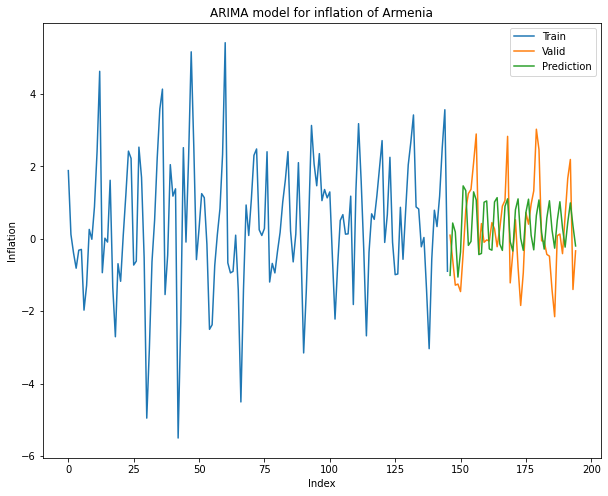

In [409]:
from pyramid.arima import auto_arima
model = auto_arima(train_armenia, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_armenia)

forecast = model.predict(n_periods=len(val_armenia))
forecast = pd.DataFrame(forecast,index = val_armenia.index,columns=['Prediction'])

#plot the predictions for validation set
plt.figure(figsize=(10, 8))
plt.plot(train_armenia, label='Train')
plt.plot(val_armenia, label='Valid')
plt.plot(forecast, label='Prediction')
plt.xlabel('Index')
plt.ylabel('Inflation')
plt.title('ARIMA model for inflation of Armenia')
plt.legend()
plt.show()

In [412]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
rms = sqrt(mean_squared_error(val_armenia, forecast))
print('RMSE:', rms)
mse = mean_squared_error(val_armenia, forecast)
print('MSE:', mse)
mae = mean_absolute_error(val_armenia, forecast)
print('MAE:', mae)

RMSE: 1.1646022341722286
MSE: 1.3562983638389463
MAE: 0.9979616637290145


In [18]:
len(df['Country Code'].unique()), len(df['Country Code'])

(179, 179)

In [0]:
df.drop(columns=['Base Year', 'Unnamed: 248'], inplace=True)

In [414]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Attribute,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,...,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2
0,"China, P.R.: Mainland",924,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,...,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000,0.287908,0.669856,1.235741,-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-0.370028,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,NaN
1,"Belarus, Rep. of",913,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,...,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,0.452184,0.172397,0.750000,0.913151,0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,0.381493,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,NaN
2,"Tajikistan, Rep. of",923,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,NaN,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,...,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Azerbaijan, Rep. of",912,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,...,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,0.181123,0.092961,0.014515,0.154629,0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,0.606804,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,NaN
4,Vietnam,582,"Prices, Consumer Price Index, All items, Perce...",PCPI_PC_PP_PT,Value,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.852619,0.000000,0.368550,0.122399,-0.122249,0.122399,0.122249

In [0]:
df_inflation = df.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Attribute'])

In [417]:
df_inflation.head()

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1,2020M2
0,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,0.300008,1.099995,0.900005,-0.600011,-0.199995,...,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000,0.287908,0.669856,1.235741,-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-0.370028,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849,NaN
1,14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,3.215926,4.300000,1.821668,1.789077,2.035153,...,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,0.452184,0.172397,0.750000,0.913151,0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,0.381493,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000,NaN
2,NaN,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,2.800000,3.700000,1.500000,2.500000,1.400000,...,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,0.600498,0.305125,0.139133,0.045657,0.106616,...,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,0.181123,0.092961,0.014515,0.154629,0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,0.606804,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053,NaN
4,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.852619,0.000000,0.368550,0.122399,-0.122249,0.122399,0.122249,0.366300,0.243309,0.364078,0.846433,2.158273,-0.586854,0.000000,...,0.480700,0.227500,0.456400,0.233800,0.208000,0.003200,-0.527443,-0.171100,0.109700,0.917200,0.592100,0.413600,0.131500,0.206400,0.504850,0.730264,-0.266128,0.082812,0.542429,0.612361,-0.090600,0.452100,0.593500,0.331600,-0.288400,-0.253700,0.098200,0.801

In [0]:
df_inflation.drop(columns=['2020M2'], inplace=True)

In [420]:
df_inflation.head(50)

,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2016M10,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8,2019M9,2019M10,2019M11,2019M12,2020M1
0,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,0.300008,1.099995,0.900005,-0.600011,-0.199995,...,-0.097656,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000,0.287908,0.669856,1.235741,-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-0.370028,0.092851,0.000000,-0.092764,0.371402,0.740056,0.826446,0.910747,0.361011,0.000000,1.438849
1,14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,3.215926,4.300000,1.821668,1.789077,2.035153,...,0.803176,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,0.452184,0.172397,0.750000,0.913151,0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,0.381493,0.038979,0.331190,-0.058252,0.194288,-0.232693,0.456754,0.541743,0.230925,0.537583,0.860000
2,NaN,0.800000,2.400000,3.300000,5.900000,1.700000,0.200000,5.900000,7.500000,12.400000,7.700000,-0.300000,2.400000,1.200000,1.300000,2.100000,2.000000,-0.800000,-0.200000,-0.900000,-0.300000,1.000000,1.800000,2.300000,1.600000,0.900000,0.400000,3.100000,0.400000,-0.700000,0.800000,0.500000,2.900000,0.400000,0.600000,2.800000,3.700000,1.500000,2.500000,1.400000,...,0.200000,0.600000,0.300000,0.600000,1.124764,1.500188,1.200000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,0.600498,0.305125,0.139133,0.045657,0.106616,...,1.343014,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,0.181123,0.092961,0.014515,0.154629,0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,0.606804,0.383925,-0.430774,-0.467068,0.054304,-0.319731,0.346839,0.416770,0.463842,0.536374,0.566053
4,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.852619,0.000000,0.368550,0.122399,-0.122249,0.122399,0.122249,0.366300,0.243309,0.364078,0.846433,2.158273,-0.586854,0.000000,...,0.831800,0.480700,0.227500,0.456400,0.233800,0.208000,0.003200,-0.527443,-0.171100,0.109700,0.917200,0.592100,0.413600,0.131500,0.206400,0.504850,0.730264,-0.266128,0.082812,0.542429,0.612361,-0.090600,0.452100,0.593500,0.331600,-0.

In [0]:
Indexes = df_inflation[df_inflation.isnull().sum(axis = 1) > 0].index

In [0]:
df_inflation.drop(Indexes , inplace=True)

In [423]:
df_inflation.shape

(66, 241)

In [0]:
df_inflation.drop(columns=['2019M9', '2019M10', '2019M11', '2019M12', '2020M1'], inplace=True)

In [425]:
df_inflation.head()


,2000M1,2000M2,2000M3,2000M4,2000M5,2000M6,2000M7,2000M8,2000M9,2000M10,2000M11,2000M12,2001M1,2001M2,2001M3,2001M4,2001M5,2001M6,2001M7,2001M8,2001M9,2001M10,2001M11,2001M12,2002M1,2002M2,2002M3,2002M4,2002M5,2002M6,2002M7,2002M8,2002M9,2002M10,2002M11,2002M12,2003M1,2003M2,2003M3,2003M4,...,2016M5,2016M6,2016M7,2016M8,2016M9,2016M10,2016M11,2016M12,2017M1,2017M2,2017M3,2017M4,2017M5,2017M6,2017M7,2017M8,2017M9,2017M10,2017M11,2017M12,2018M1,2018M2,2018M3,2018M4,2018M5,2018M6,2018M7,2018M8,2018M9,2018M10,2018M11,2018M12,2019M1,2019M2,2019M3,2019M4,2019M5,2019M6,2019M7,2019M8
0,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,1.021334,0.099989,-0.599990,0.200005,-0.500006,-1.199986,-0.500009,0.099990,0.900010,0.299996,-0.200001,0.100003,0.299991,1.100008,-1.300002,-0.299990,-0.300002,-0.900003,-0.700002,0.299996,1.000000,0.200001,-0.100007,0.300008,1.099995,0.900005,-0.600011,-0.199995,...,-0.392157,-0.196850,0.197239,0.098425,0.688299,-0.097656,0.097752,0.195312,1.072125,-0.192864,-0.289855,0.000000,0.096899,-0.193611,-0.096993,0.485437,0.579710,0.096061,0.000000,0.287908,0.669856,1.235741,-1.126761,-0.189934,-0.190295,0.000000,0.285987,0.665399,0.661001,0.187617,-0.374532,0.093985,0.469484,1.028037,-0.370028,0.092851,0.000000,-0.092764,0.371402,0.740056
1,14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4.800000,3.816794,3.952206,3.271441,2.654110,2.085071,1.633987,0.723473,2.075020,3.596560,4.528302,5.487365,6.100000,3.581527,2.547771,2.928128,2.241379,1.349073,1.164725,1.151316,1.138211,1.688103,3.241107,3.215926,4.300000,1.821668,1.789077,2.035153,...,0.488538,0.392670,0.353883,-0.148478,0.669145,0.803176,0.787618,0.481599,0.870000,0.535343,0.276107,0.658865,0.283314,0.711154,-0.106404,-0.794035,0.253782,1.197546,0.452184,0.172397,0.750000,0.913151,0.777024,0.292797,-0.282211,0.429394,-0.155476,0.126521,0.806765,0.511040,0.556408,0.782293,0.880000,1.338224,0.381493,0.038979,0.331190,-0.058252,0.194288,-0.232693
3,0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,0.327930,0.577859,0.277551,0.192262,-0.532763,-0.375475,-0.833657,-0.528164,0.483648,0.565807,0.324510,0.878021,0.639031,0.443672,0.396099,0.945696,0.489083,-1.018483,-0.424372,-0.552050,0.450263,0.614845,0.727277,0.600498,0.305125,0.139133,0.045657,0.106616,...,-0.121102,-0.465617,-0.291006,0.521861,2.269735,1.343014,1.666656,3.042429,2.320857,1.622746,1.594970,0.238658,0.171032,-1.035063,0.111020,0.199216,0.729418,1.102993,0.181123,0.092961,0.014515,0.154629,0.206745,-0.204086,-0.032774,-0.658192,-0.591018,0.863519,0.248491,0.163502,0.581491,0.785682,0.190598,0.563878,0.606804,0.383925,-0.430774,-0.467068,0.054304,-0.319731
4,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,0.250836,0.417014,-0.747508,-0.502092,-0.168209,0.000000,-0.168492,0.000000,0.506329,-0.167926,0.252313,0.838926,1.106530,2.241594,-0.852619,0.000000,0.368550,0.122399,-0.122249,0.122399,0.122249,0.366300,0.243309,0.364078,0.846433,2.158273,-0.586854,0.000000,...,0.540800,0.464500,0.128000,0.102400,0.543100,0.831800,0.480700,0.227500,0.456400,0.233800,0.208000,0.003200,-0.527443,-0.171100,0.109700,0.917200,0.592100,0.413600,0.131500,0.206400,0.504850,0.730264,-0.266128,0.082812,0.542429,0.612361,-0.090600,0.452100,0.593500,0.331600,-0.288400,-0.253700,0.098200,0.801600,-0.209600,0.309700,0.493000,-0.092200,0.181600,0.280100
8,-0.683995,0.275482,0.274725,0.410959,0.272851,0.136054,-0.407609,0.000000,0.682128,0.000000,0.271003,0.000000,-0.675676,0.272109,0.271370,0.676590,0.672043,0.133511,-0.666667,0.402685,0.267380,-0.133333,0.000000,0.133511,-0.266667,0.267380,0.266667,0.531915,0.264550,0.000000,-0.263852,0.264550,0.263852,0.131579,0.000000,0.262812,-0.524246,0.263505,0.394218,0.523560,...,0.198807,0.198413,-0.099010,0.297324,0.296443,0.098522,

In [0]:
# create new dataframe with 13 columns
# df um amen mi row um avelacnel - 13 syun, mek - mek shift arac, mi hat el syun - predictable monthy

In [0]:
import pandas as pd

In [0]:
res_df = pd.DataFrame()

In [0]:
# month_col = df_inflation.columns[22]
# calendar.month_name[int(month_col[month_col.find('M') + 1:])]

In [0]:
import calendar

startColIndex = 1
# lastColIndex = 14
res_df = pd.DataFrame(df_inflation.iloc[:,0:13].values)
# print(df_inflation.columns[12])
month_col = df_inflation.columns[12]
# print('shape ', res_df.shape)
res_df['month'] = calendar.month_name[int(month_col[month_col.find('M') + 1:])]
for i in range(startColIndex, len(df_inflation.columns)-13):
  last_row = res_df.shape[0]
  res_df = res_df.append(pd.DataFrame(df_inflation.iloc[:,i:i + 13].values))
  month_col = df_inflation.columns[i + 12]
  res_df.iloc[last_row:, -1]= calendar.month_name[int(month_col[month_col.find('M') + 1:])]

In [431]:
# change the order of last and almost last column values
res_df['target'] = res_df.iloc[:, 12]
res_df.drop([12], axis=1, inplace=True)
res_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,month,target
0,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,January,1.021334
1,14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,January,4.800000
2,0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,January,0.327930
3,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,January,0.250836
4,-0.683995,0.275482,0.274725,0.410959,0.272851,0.136054,-0.407609,0.000000,0.682128,0.000000,0.271003,0.000000,January,-0.675676


In [432]:
np.unique(res_df[['month']].values)

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype=object)

In [433]:
res_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,month,target
0,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,January,1.021334
1,14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,January,4.800000
2,0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,January,0.327930
3,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,January,0.250836
4,-0.683995,0.275482,0.274725,0.410959,0.272851,0.136054,-0.407609,0.000000,0.682128,0.000000,0.271003,0.000000,January,-0.675676


In [434]:
res_df.shape

(14718, 14)

## Light GBM Model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [440]:
res_df['month'] = res_df['month'].astype('category')
encoder = LabelEncoder()
res_df['month'] = encoder.fit_transform(res_df['month'])
res_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,month,target
0,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,4,1.021334
1,14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,4,4.800000
2,0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,4,0.327930
3,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,4,0.250836
4,-0.683995,0.275482,0.274725,0.410959,0.272851,0.136054,-0.407609,0.000000,0.682128,0.000000,0.271003,0.000000,4,-0.675676


In [0]:
X = res_df.drop(columns=['target'])
y = res_df.loc[:, 'target']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [443]:
X_train['month']

39     3
59     9
25     2
30     3
18     0
      ..
43     5
20     2
44    10
2      3
10     7
Name: month, Length: 11774, dtype: int64

In [444]:
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# evalimport lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval

Starting training...
[1]	valid_0's l2: 0.524346	valid_0's l1: 0.482269
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.507832	valid_0's l1: 0.473891
[3]	valid_0's l2: 0.492316	valid_0's l1: 0.466188
[4]	valid_0's l2: 0.478634	valid_0's l1: 0.458849
[5]	valid_0's l2: 0.465604	valid_0's l1: 0.452165
[6]	valid_0's l2: 0.453768	valid_0's l1: 0.445344
[7]	valid_0's l2: 0.443221	valid_0's l1: 0.439439
[8]	valid_0's l2: 0.433732	valid_0's l1: 0.433968
[9]	valid_0's l2: 0.429493	valid_0's l1: 0.431191
[10]	valid_0's l2: 0.421384	valid_0's l1: 0.42647
[11]	valid_0's l2: 0.414381	valid_0's l1: 0.422334
[12]	valid_0's l2: 0.407962	valid_0's l1: 0.418534
[13]	valid_0's l2: 0.40332	valid_0's l1: 0.415607
[14]	valid_0's l2: 0.39806	valid_0's l1: 0.412431
[15]	valid_0's l2: 0.394173	valid_0's l1: 0.409989
[16]	valid_0's l2: 0.388884	valid_0's l1: 0.406943
[17]	valid_0's l2: 0.384217	valid_0's l1: 0.404179
[18]	valid_0's l2: 0.37984	valid_0's l1: 0.401537
[19]	valid_0'

In [445]:
print('The MAE of prediction is:', mean_absolute_error(y_test, y_pred))
print('The MSE of prediction is:', mean_squared_error(y_test, y_pred))
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

The MAE of prediction is: 0.3969439642454997
The MSE of prediction is: 0.37272572230795104
The rmse of prediction is: 0.6105126717013751


## Random Forest Model

In [454]:
from sklearn.ensemble import RandomForestRegressor
RForest = RandomForestRegressor()
RForest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [455]:
print(RForest.score(X_train,y_train))
print(RForest.score(X_test, y_test))

0.9098241880675897
0.3694878411936965


In [456]:
print('MAE:', mean_absolute_error(y_test, RForest.predict(X_test)))
print('MSE:', mean_squared_error(y_test, RForest.predict(X_test)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, RForest.predict(X_test))))

MAE: 0.3778006634164375
MSE: 0.34271165117223373
RMSE: 0.5854157934086112


### Hyperparameter tuning for RF

In [449]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 21, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 11, 12, 13, 14, 16, 17, 18, 19, 21, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 222, 244, 266, 288, 311, 333, 355, 377, 400]}


In [450]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42)
# rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   5.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   5.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   5.6s
[CV] n_estimators=311, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=16, bootstrap=True 
[CV]  n_estimators=311, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=16, bootstrap=True, total=   5.9s
[CV] n_estimators=311, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=16, bootstrap=True 
[CV]  n_estimators=311, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=16, bootstrap=True, total=   6.0s
[CV] n_estimators=311, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=16, bootstrap=True 
[CV]  n_estimators=311, min_sampl

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 38.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [452]:
from pprint import pprint
pprint(rf_random.best_estimator_.get_params())

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 19,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 288,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [453]:
predictions = rf_random.predict(X_test)
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('RF score:', rf_random.score(X_train, y_train))
print('RF score:', rf_random.score(X_test, y_test))

MAE: 0.36785730498330144
MSE: 0.331089289360803
RMSE: 0.5754035882411606
RF score: 0.8180828248819414
RF score: 0.3908703661562644


## Creating a Neural Net Model with Multiple Inputs

The first submodel will accept textual input in the form of months. This submodel will consist of an input shape layer, an embedding layer, and an LSTM layer of 128 neurons. The second submodel will accept input in the form of meta information from the 0-11 columns. The second submodel also consist of three layers. An input layer and two dense layers.

The output from the LSTM layer of the first submodel and the output from the second dense layer of the second submodel will be concatenated together and will be used as concatenated input to another dense layer with 10 neurons. Finally, the output dense layer will have one neuron corresponding to inflation number.

In [459]:
np.unique(res_df['month'].values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [0]:
res_df['month'] = res_df['month'].apply(lambda x: calendar.month_name[x + 1])

In [0]:
X = res_df.drop('target', axis=1)

y = res_df['target']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train = X[:int(0.8*(len(X)))]
y_train = y[:int(0.8*(len(y)))]
X_test = X[int(0.8*(len(X))):]
y_test = y[int(0.8*(len(y))):]

In [0]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
X1_train = []
sentences = list(X_train["month"])
for sen in sentences:
    X1_train.append(sen)

In [0]:
X1_test = []
sentences = list(X_test["month"])
for sen in sentences:
    X1_test.append(sen)

In [474]:
X1_train

['May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 'April',
 '

In [0]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

In [0]:
tokenizer = Tokenizer(num_words=12)
tokenizer.fit_on_texts(X1_train)

X1_train = tokenizer.texts_to_sequences(X1_train)
X1_test = tokenizer.texts_to_sequences(X1_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 1

X1_train = pad_sequences(X1_train, padding='post', maxlen=maxlen)
X1_test = pad_sequences(X1_test, padding='post', maxlen=maxlen)

In [0]:


maxlen = 1
vocab_length = 15

In [0]:
X2_train = X_train.drop('month', axis=1).values

In [479]:
X2_train

array([[ 1.32080649e+00,  1.30117800e+00, -1.38887691e+00, ...,
        -2.82571805e-04,  3.00487706e-01,  9.99986618e-02],
       [ 1.41000000e+01,  9.29009642e+00,  5.77385728e+00, ...,
         5.16563729e+00,  5.39241858e+00,  5.11651469e+00],
       [ 7.30307919e-01,  1.02790102e+00,  5.82792784e-02, ...,
         5.75449963e-01,  4.37115344e-01,  6.49634453e-01],
       ...,
       [ 2.00400802e-01,  3.00000000e-01, -2.99102692e-01, ...,
        -1.69491525e+00,  1.92697769e+00,  1.59203980e+00],
       [-1.70085043e-01,  8.01763881e-02, -1.00140196e+00, ...,
         3.19904029e-01, -3.98604883e-01,  6.00300150e-02],
       [-1.86213234e-01,  0.00000000e+00, -3.73131298e-01, ...,
         1.85754497e-01, -3.70720549e-01,  1.86000000e-01]])

In [0]:
X2_test = X_test.drop('month', axis=1).values

In [0]:

input_1 = Input(shape=(maxlen,))

input_2 = Input(shape=(12,))

In [0]:
embedding_layer = Embedding(vocab_size, 8, input_length=maxlen)(input_1)
flatten_embedding = Flatten()(embedding_layer)
# dense_layer_embedding = Dense(10, activation='relu')(embedding_layer)
# LSTM_Layer_1 = LSTM(128)(embedding_layer)
# LSTM_Layer_2 = LSTM(128)(LSTM_Layer_1)

In [483]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,month
0,1.320806,1.301178,-1.388877,-0.588980,-0.597836,-0.907688,-0.598034,0.595542,2.011006,-0.000283,0.300488,0.099999,May
1,14.100000,9.290096,5.773857,5.079606,4.617605,6.137931,4.678363,3.600248,6.710605,5.165637,5.392419,5.116515,May
2,0.730308,1.027901,0.058279,0.015539,-0.480645,-0.834955,-0.525449,-0.188417,0.735146,0.575450,0.437115,0.649634,May
3,0.415628,1.572848,-1.140994,-0.741962,-0.581395,-0.501253,-0.587741,0.084459,-0.168776,0.084531,0.929054,0.083682,May
4,-0.683995,0.275482,0.274725,0.410959,0.272851,0.136054,-0.407609,0.000000,0.682128,0.000000,0.271003,0.000000,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,-0.505140,0.306863,-0.725500,0.669722,1.017533,0.159460,0.279337,0.239000,0.179760,0.526560,-0.387561,0.054485,October
22,-0.766479,0.000000,-0.411946,0.568769,0.616967,0.459888,0.203459,-0.152284,-0.355872,-0.306122,-0.562948,0.102934,October
23,0.200401,0.300000,-0.299103,0.800000,-0.297619,-0.796020,0.000000,0.100301,0.501002,-1.694915,1.926978,1.592040,October
24,-0.170085,0.080176,-1.001402,0.667611,0.653135,0.109813,0.239330,-0.079586,-0.408204,0.319904,-0.398605,0.060030,October


In [0]:
dense_layer_1 = Dense(100, activation='sigmoid')(input_2)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
# output = Dense(1, activation='linear')(dense_layer_2)
# model = Model(input_2, outputs=output)

In [0]:
concat_layer = Concatenate()([flatten_embedding, dense_layer_2])
dense_layer_3 = Dense(10, activation='sigmoid')(concat_layer)
output = Dense(1, activation='linear')(dense_layer_3)
model = Model(inputs=[input_1, input_2], outputs=output)

In [0]:
# dense_layer_1 = Dense(10, activation='relu')(input_2)
# dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)

In [487]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mse', optimizer='adam', metrics=['acc'])
print(model.summary())

Model: "model_28"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
input_16 (InputLayer)           (None, 12)           0                                            
__________________________________________________________________________________________________
embedding_26 (Embedding)        (None, 1, 8)         104         input_15[0][0]                   
__________________________________________________________________________________________________
dense_104 (Dense)               (None, 100)          1300        input_16[0][0]                   
___________________________________________________________________________________________

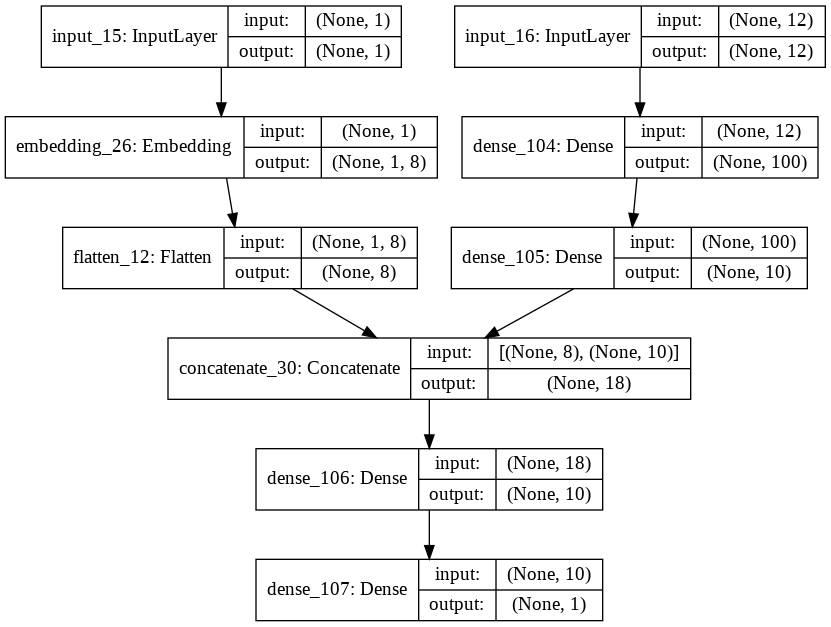

In [488]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [489]:
X1_train

array([[ 1],
       [ 1],
       [ 1],
       ...,
       [11],
       [11],
       [11]], dtype=int32)

In [0]:
history = model.fit(x=[X1_train, X2_train], y=y_train, epochs=100, verbose=1, validation_split=0.2)

Train on 9419 samples, validate on 2355 samples
Epoch 1/100
9419/9419 [==============================] - 5s 512us/step - loss: 0.6777 - acc: 0.0352 - val_loss: 0.3296 - val_acc: 0.0352
Epoch 2/100
9419/9419 [==============================] - 1s 144us/step - loss: 0.5397 - acc: 0.0395 - val_loss: 0.3035 - val_acc: 0.0344
Epoch 3/100
9419/9419 [==============================] - 1s 152us/step - loss: 0.5286 - acc: 0.0398 - val_loss: 0.3031 - val_acc: 0.0344
Epoch 4/100
9419/9419 [==============================] - 1s 135us/step - loss: 0.5208 - acc: 0.0399 - val_loss: 0.3036 - val_acc: 0.0344
Epoch 5/100
9419/9419 [==============================] - 1s 149us/step - loss: 0.5137 - acc: 0.0393 - val_loss: 0.2991 - val_acc: 0.0344
Epoch 6/100
9419/9419 [==============================] - 1s 145us/step - loss: 0.5072 - acc: 0.0391 - val_loss: 0.3020 - val_acc: 0.0344
Epoch 7/100
9419/9419 [==============================] - 1s 142us/step - loss: 0.5018 - acc: 0.0391 - val_loss: 0.2988 - val_acc: 

In [395]:
score = model.evaluate(x=[X1_test, X2_test], y=y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1]*100)

2944/2944 [==============================] - 0s 59us/step
Test Score: 0.24798707344123852
Test Accuracy: 3.192934782608696


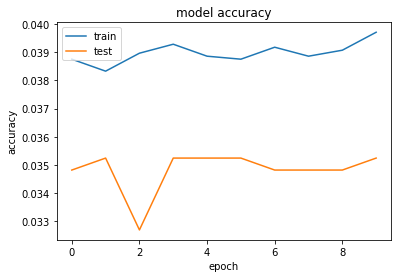

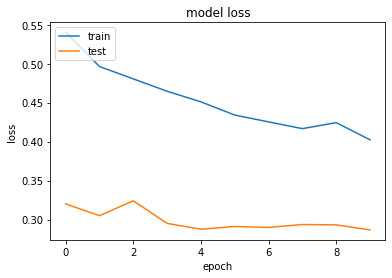

In [367]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()